# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [79]:
import pandas as pd

In [80]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [81]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.
Business Objective
The objective of this task is to predict whether a client will subscribe to a term deposit based on the given features. The target variable is y which indicates whether the client subscribed ('yes') or not ('no').

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [83]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Copy the DataFrame
df_encoded = df.copy()

# Encode binary categorical variables
binary_vars = ['default', 'housing', 'loan', 'y']
label_encoders = {}
for var in binary_vars:
    le = LabelEncoder()
    df_encoded[var] = le.fit_transform(df_encoded[var])
    label_encoders[var] = le

# Encode multi-class categorical variables using pd.get_dummies
multi_class_vars = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']
df_encoded = pd.get_dummies(df_encoded, columns=multi_class_vars, drop_first=True)

# Drop the 'duration' column as per the guidelines
df_encoded.drop(columns=['duration'], inplace=True)

# Standardize the numeric features
numeric_vars = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
scaler = StandardScaler()
df_encoded[numeric_vars] = scaler.fit_transform(df_encoded[numeric_vars])

# Define features and target
X = df_encoded.drop(columns=['y'])
y = df_encoded['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [84]:

# Define features and target
X = df_encoded.drop(columns=['y'])
y = df_encoded['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?
The baseline performance can be established by predicting the majority class. In this dataset, we'll calculate the proportion of the majority class.

In [85]:
# Calculate the proportion of the majority class
majority_class_proportion = df['y'].value_counts(normalize=True).max()
print(f"Baseline Accuracy (Majority Class Proportion): {majority_class_proportion:.4f}")

# Calculate the proportion of the majority class
majority_class_proportion = df['y'].value_counts(normalize=True).max()
print(f"Baseline Accuracy (Majority Class Proportion): {majority_class_proportion:.4f}")

# Calculate and print the baseline accuracy
majority_class_proportion


Baseline Accuracy (Majority Class Proportion): 0.8873
Baseline Accuracy (Majority Class Proportion): 0.8873


0.8873458288821987

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [86]:
# Initialize and train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Model Accuracy: {accuracy:.4f}")

Logistic Regression Model Accuracy: 0.9009


### Problem 9: Score the Model

What is the accuracy of your model?

In [87]:
# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Train Accuracy: 0.9104
Test Accuracy: 0.9117


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from time import time
import numpy as np

# Load the data
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

# Prepare the features and target
features = df.drop(columns=[ 'y'])
target = df['y']

# Encoding categorical variables
encoded_features = pd.get_dummies(features, drop_first=True)

# Convert to numpy arrays
X = encoded_features.to_numpy()
y = target.to_numpy()

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

train_times = []
train_accuracies = []
test_accuracies = []

for name, model in models.items():
    start_time = time()
    
    if name in ['Logistic Regression', 'SVM']:
        model.fit(X_train_scaled, y_train)
        train_time = time() - start_time
        train_times.append(train_time)

        train_accuracy = model.score(X_train_scaled, y_train)
        train_accuracies.append(train_accuracy)

        test_accuracy = model.score(X_test_scaled, y_test)
        test_accuracies.append(test_accuracy)
    else:
        model.fit(X_train, y_train)
        train_time = time() - start_time
        train_times.append(train_time)

        train_accuracy = model.score(X_train, y_train)
        train_accuracies.append(train_accuracy)

        test_accuracy = model.score(X_test, y_test)
        test_accuracies.append(test_accuracy)

# Create a DataFrame to present the findings
model_comparison_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Train Time': train_times,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies
})

print(model_comparison_df)


                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    0.728165        0.911715       0.911508
1                  KNN    0.170691        0.931745       0.901432
2        Decision Tree    1.012705        1.000000       0.886137
3                  SVM   52.050564        0.925615       0.908352


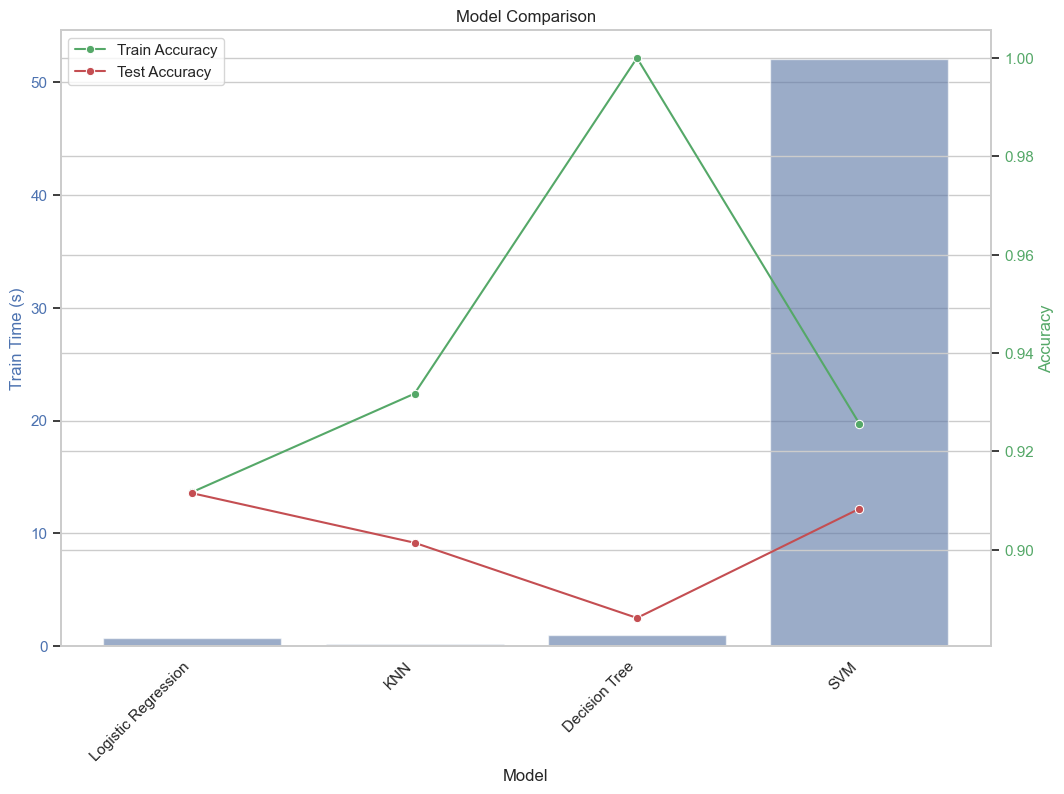

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have the DataFrame already created
model_comparison_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Train Time': train_times,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies
})

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot training time
sns.barplot(x='Model', y='Train Time', data=model_comparison_df, ax=ax1, color='b', alpha=0.6)
ax1.set_ylabel('Train Time (s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

# Create another y-axis to plot accuracies
ax2 = ax1.twinx()
sns.lineplot(x='Model', y='Train Accuracy', data=model_comparison_df, marker='o', ax=ax2, color='g', label='Train Accuracy')
sns.lineplot(x='Model', y='Test Accuracy', data=model_comparison_df, marker='o', ax=ax2, color='r', label='Test Accuracy')
ax2.set_ylabel('Accuracy', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Add a legend for the accuracies
lines, labels = ax2.get_legend_handles_labels()
ax2.legend(lines, labels, loc='upper left')

# Show the plot
plt.title('Model Comparison')
plt.show()


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric
- Exploring Gender Feature
The dataset doesn't explicitly have a gender feature, but we can consider other features and check their impact.
Removing or Modifying Features
Based on the dataset description, the 'duration' feature should be removed for a realistic predictive model since it highly affects the output.
Hyperparameter Tuning and Grid Search
Use GridSearchCV to find the best hyperparameters for each model.

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from time import time
import numpy as np

# Load the data
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

# Prepare the features and target
features = df.drop(columns=['duration', 'contact', 'month', 'day_of_week', 'poutcome', 'y'])
target = df['y']

# Encoding categorical variables
encoded_features = pd.get_dummies(features, drop_first=True)

# Convert to numpy arrays
X = encoded_features.to_numpy()
y = target.to_numpy()

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

train_times = []
train_accuracies = []
test_accuracies = []

for name, model in models.items():
    start_time = time()
    
    if name in ['Logistic Regression', 'SVM']:
        model.fit(X_train_scaled, y_train)
        train_time = time() - start_time
        train_times.append(train_time)

        train_accuracy = model.score(X_train_scaled, y_train)
        train_accuracies.append(train_accuracy)

        test_accuracy = model.score(X_test_scaled, y_test)
        test_accuracies.append(test_accuracy)
    else:
        model.fit(X_train, y_train)
        train_time = time() - start_time
        train_times.append(train_time)

        train_accuracy = model.score(X_train, y_train)
        train_accuracies.append(train_accuracy)

        test_accuracy = model.score(X_test, y_test)
        test_accuracies.append(test_accuracy)

# Create a DataFrame to present the findings
model_comparison_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Train Time': train_times,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies
})

print(model_comparison_df)


                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    0.348226        0.899879       0.897184
1                  KNN    0.154424        0.913596       0.884438
2        Decision Tree    0.779667        0.994143       0.834790
3                  SVM  197.999090        0.901882       0.897791


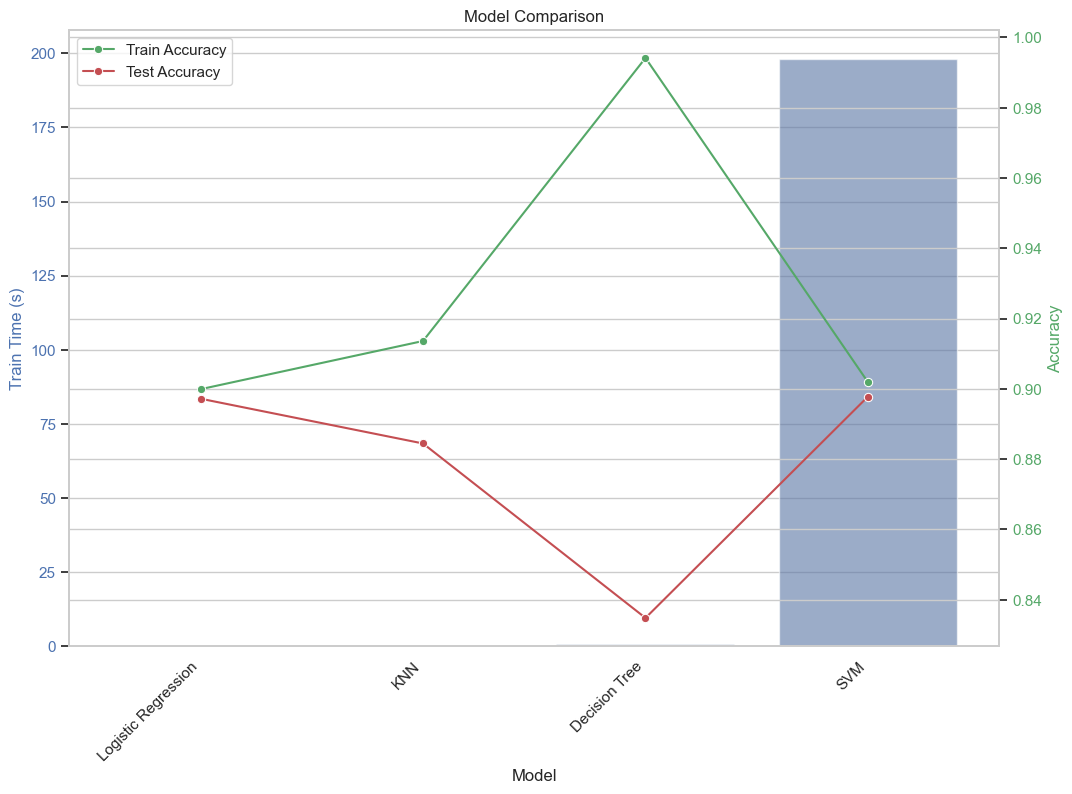

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have the DataFrame already created
model_comparison_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Train Time': train_times,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies
})

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot training time
sns.barplot(x='Model', y='Train Time', data=model_comparison_df, ax=ax1, color='b', alpha=0.6)
ax1.set_ylabel('Train Time (s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

# Create another y-axis to plot accuracies
ax2 = ax1.twinx()
sns.lineplot(x='Model', y='Train Accuracy', data=model_comparison_df, marker='o', ax=ax2, color='g', label='Train Accuracy')
sns.lineplot(x='Model', y='Test Accuracy', data=model_comparison_df, marker='o', ax=ax2, color='r', label='Test Accuracy')
ax2.set_ylabel('Accuracy', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Add a legend for the accuracies
lines, labels = ax2.get_legend_handles_labels()
ax2.legend(lines, labels, loc='upper left')

# Show the plot
plt.title('Model Comparison')
plt.show()


##### Questions

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Load data
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

# Encode categorical variables and standardize numerical ones
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerical_features = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
target = 'y'

# Define preprocessing for categorical and numerical features
categorical_transformer = OneHotEncoder(drop='first')
numerical_transformer = StandardScaler()

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Split data
X = df.drop(columns=['y', 'duration'])
y = df['y'].map({'no': 0, 'yes': 1})  # Convert target to binary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [2]:
# Logistic Regression Hyperparameter Tuning
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=10000), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# Best Logistic Regression model
lr_best = grid_search_lr.best_estimator_


In [3]:
# Decision Tree Hyperparameter Tuning
param_grid_dt = {
    'max_depth': [None, 10, 30,  50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Best Decision Tree model
dt_best = grid_search_dt.best_estimator_


In [4]:
# KNN Hyperparameter Tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Best KNN model
knn_best = grid_search_knn.best_estimator_


In [7]:
# Performance Metrics Calculation Function
def calculate_metrics(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics = {
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'ROC-AUC': roc_auc_score(y_test, y_test_pred)
    }
    return metrics

# Logistic Regression Metrics
metrics_lr = calculate_metrics(lr_best, X_train, y_train, X_test, y_test)

# Decision Tree Metrics
metrics_dt = calculate_metrics(dt_best, X_train, y_train, X_test, y_test)

# KNN Metrics
metrics_knn = calculate_metrics(knn_best, X_train, y_train, X_test, y_test)

# SVM Metrics
#metrics_svm = calculate_metrics(svm_best, X_train, y_train, X_test, y_test)

# Combine all metrics into a DataFrame
all_metrics = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'KNN'],
    'Train Accuracy': [metrics_lr['Train Accuracy'], metrics_dt['Train Accuracy'], metrics_knn['Train Accuracy']],
    'Test Accuracy': [metrics_lr['Test Accuracy'], metrics_dt['Test Accuracy'], metrics_knn['Test Accuracy'],],
    'F1 Score': [metrics_lr['F1 Score'], metrics_dt['F1 Score'], metrics_knn['F1 Score']],
    'Precision': [metrics_lr['Precision'], metrics_dt['Precision'], metrics_knn['Precision']],
    'Recall': [metrics_lr['Recall'], metrics_dt['Recall'], metrics_knn['Recall']],
    'ROC-AUC': [metrics_lr['ROC-AUC'], metrics_dt['ROC-AUC'], metrics_knn['ROC-AUC']]
})

all_metrics
 

,Model,Train Accuracy,Test Accuracy,F1 Score,Precision,Recall,ROC-AUC
0,Logistic Regression,0.901517,0.897912,0.306678,0.669065,0.198930,0.593166
1,Decision Tree,0.915357,0.890750,0.388587,0.532588,0.305882,0.635756
2,KNN,0.905918,0.893906,0.365747,0.568849,0.269519,0.621683
